 Neste notebook será utilizado os dados manipulados anteriormente, cujo arquivo esta na pasta manipulação de dados e a partir dos mesmos serão geradas visualizações. 

## 1- Importando a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/delitos_NY_2020/master/1%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/dados_manipulados.csv'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,delito,fds
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,1.0,0
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,1.0,0
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,1.0,0
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,1.0,0
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,1.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   140413 non-null  object 
 1   descricao_da_ofensa  140376 non-null  object 
 2   nivel_da_ofensa      139024 non-null  object 
 3   bairro               140413 non-null  object 
 4   idade_do_infrator    140413 non-null  object 
 5   sexo_do_infrator     140413 non-null  object 
 6   raca_do_infrator     140413 non-null  object 
 7   latitude             140413 non-null  float64
 8   longitude            140413 non-null  float64
 9   ano                  140413 non-null  int64  
 10  dia                  140413 non-null  int64  
 11  mes                  140413 non-null  int64  
 12  dia_da_semana        140413 non-null  object 
 13  delito               139024 non-null  float64
 14  fds                  140413 non-null  int64  
dtypes: float64(3), in

## 2- Preparaçao dos dados


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [6]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

## 3.0  Gerando algumas vizualizações.

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Será criado um DataFrame delitos_concluidos_por_bairros que será utilizado neste tópico
 - Selecionando apenas os delitos concluídos

 - Criando o DataFrame delitos_concluidos_por_bairros

In [7]:
delitos_concluidos_por_bairros_df = df.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']

- Visualizando a quantidade total de delitos em cada bairro

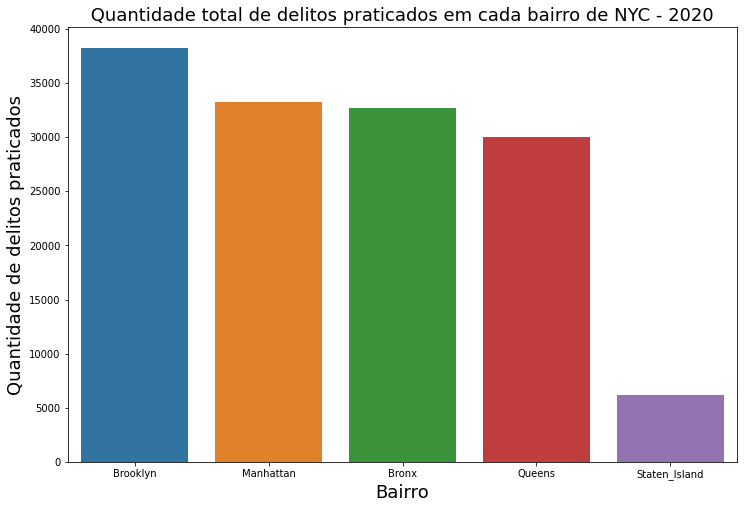

In [11]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'bairro' , y = 'qtde_delitos' , data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade total de delitos praticados em cada bairro de NYC - 2020 '
plt.ylabel('Quantidade de delitos praticados', fontsize = 18)
plt.xlabel('Bairro', fontsize = 18)
plt.title(titulo, fontsize = 18)
plt.show()

 - Distribuição dos delitos cometidos de acordo com o dia do mes

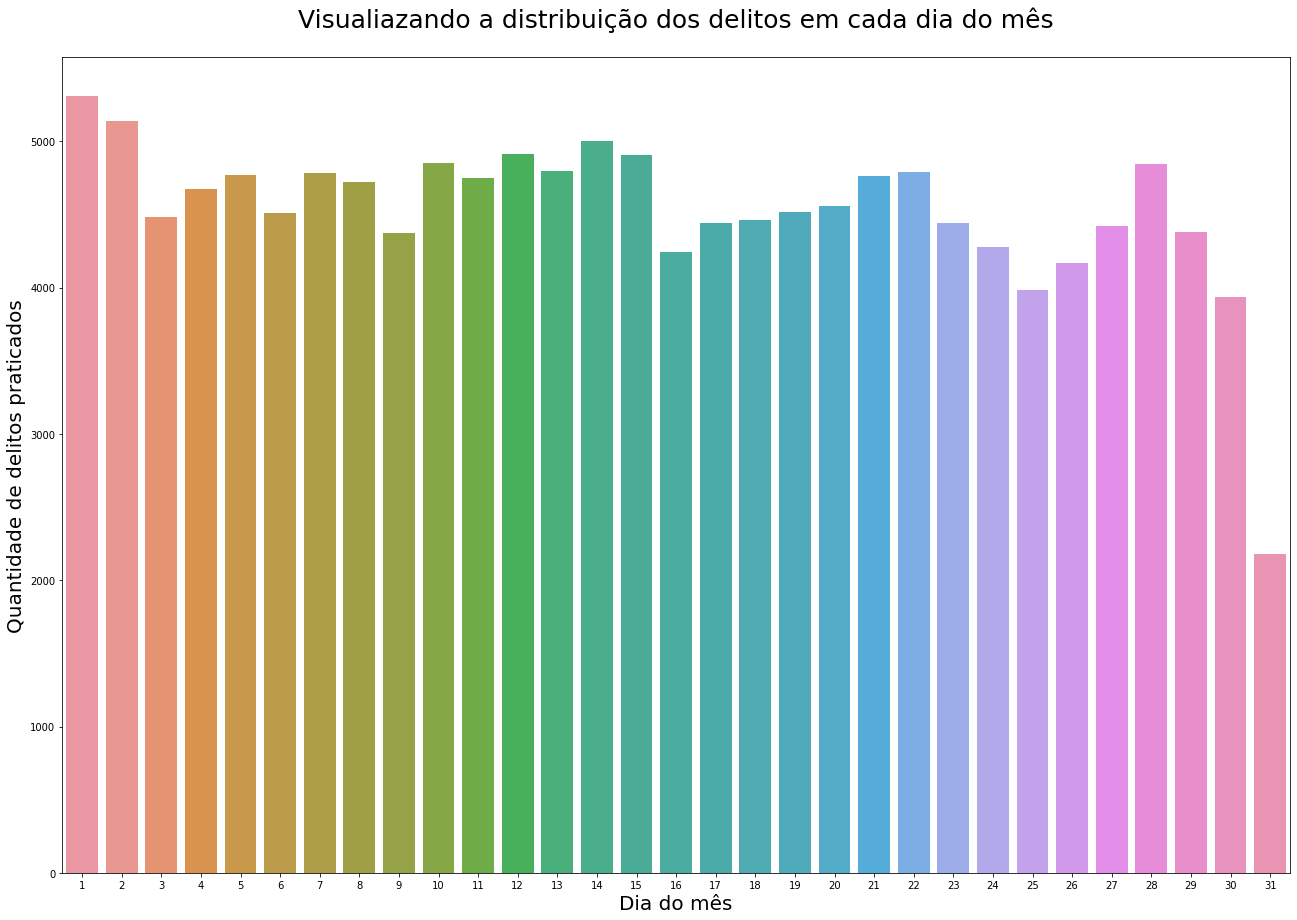

In [18]:
f, ax = plt.subplots(figsize=(22, 15))
sns.countplot(x="dia", data=df);
plt.ylabel('Quantidade de delitos praticados', fontsize = 20)
plt.xlabel('Dia do mês', fontsize = 20)
plt.title('Visualiazando a distribuição dos delitos em cada dia do mês', fontsize = 25, y=1.03)
plt.show()

 - Distribuição dos delitos por mes

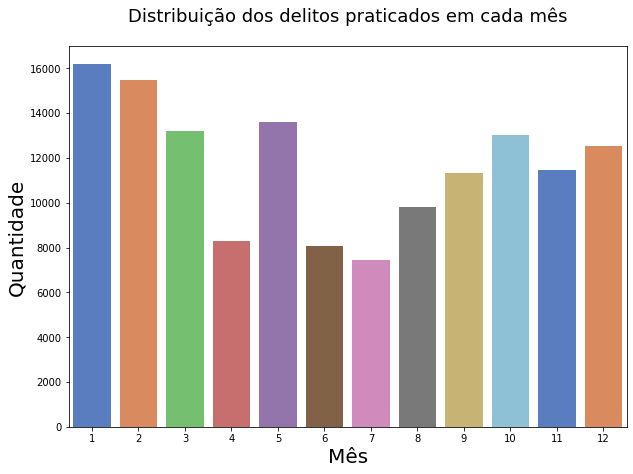

In [21]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="mes",data=df , palette="muted")
titulo='Distribuição dos delitos praticados em cada mês'
plt.title(titulo, fontsize=18, y=1.05)
plt.ylabel('Quantidade', fontsize = 20)
plt.xlabel('Mês', fontsize = 20)
plt.show()

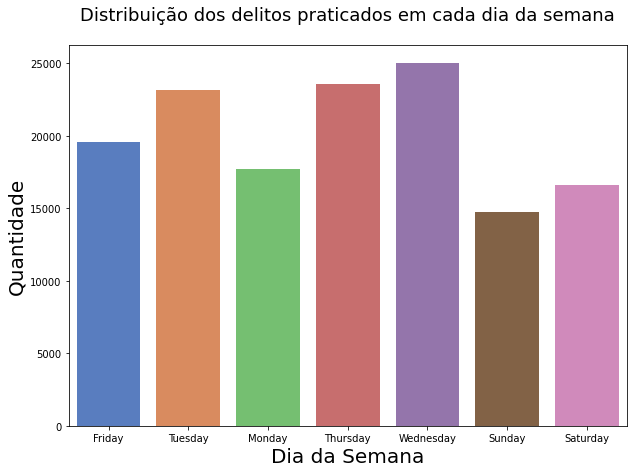

In [47]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="dia_da_semana",data=df , palette="muted")
titulo='Distribuição dos delitos praticados em cada dia da semana'
plt.title(titulo, fontsize=18, y=1.05)
plt.ylabel('Quantidade', fontsize = 20)
plt.xlabel('Dia da Semana', fontsize = 20)
plt.show()

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [36]:
tipos_de_delitos = df.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

 - Visualizando os tipos de delitos mais recorrentes

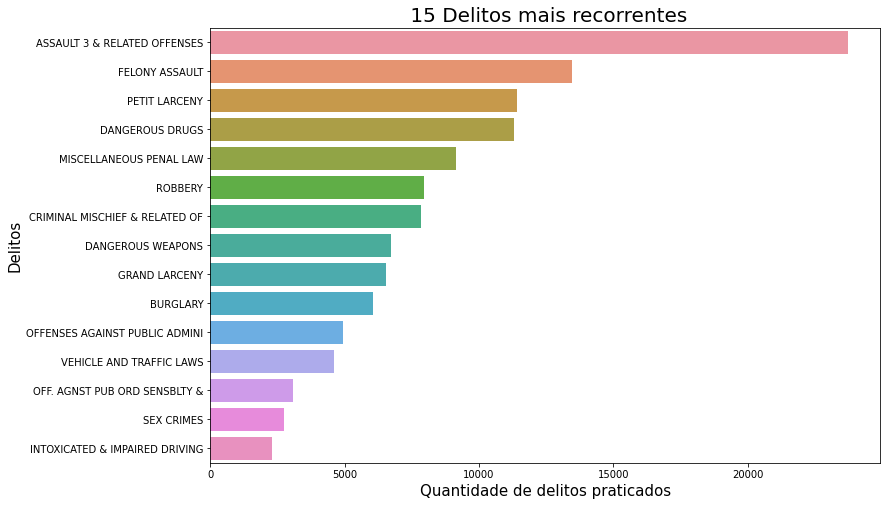

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo=' 15 Delitos mais recorrentes'
plt.title(titulo, fontsize=20)
plt.xlabel('Quantidade de delitos praticados', fontsize = 15)
plt.ylabel('Delitos', fontsize = 15)
plt.show()

###  3.3- Visualizando a distribuicao do sexo e raça dos infratores 

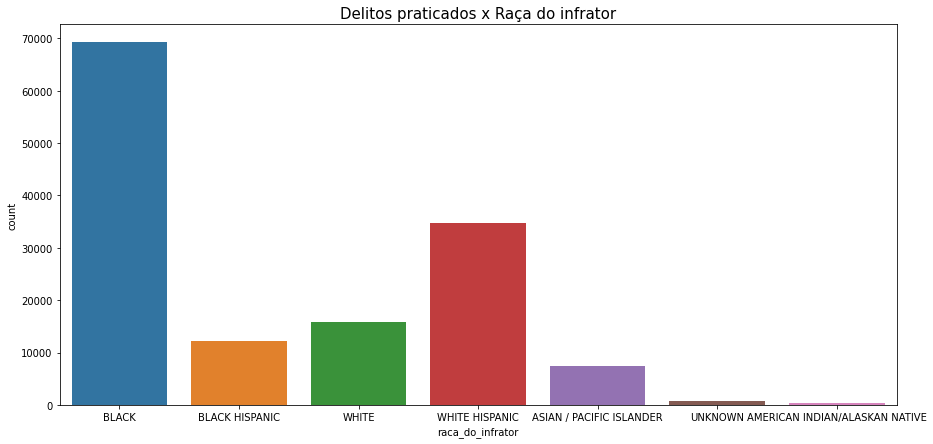

In [38]:
f, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x ="raca_do_infrator", data=df)
titulo ='Delitos praticados x Raça do infrator'
plt.title(titulo, fontsize=15)
plt.show()

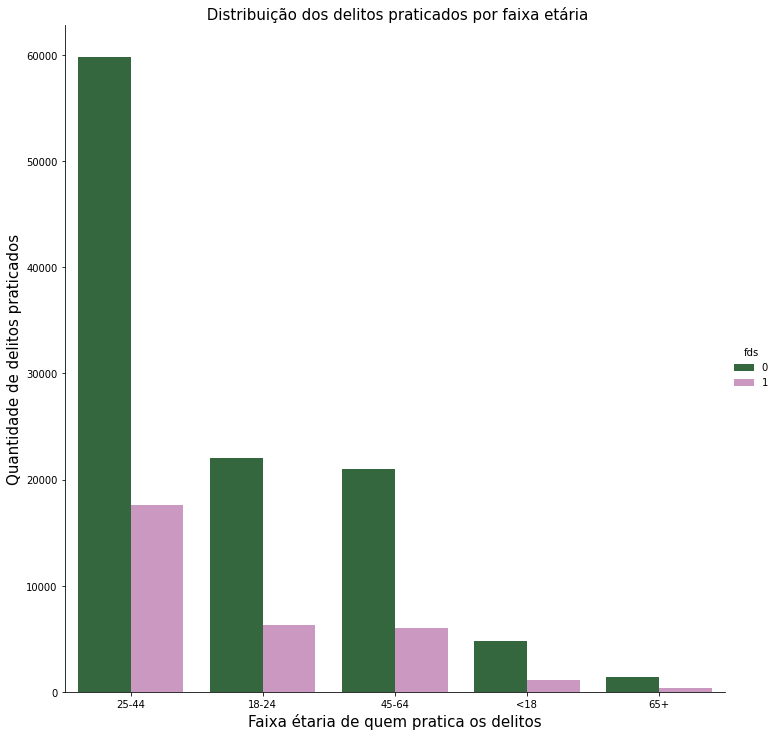

In [44]:
ax = sns.catplot(x="idade_do_infrator",hue='fds',kind="count",palette="cubehelix", data=df, height=10, aspect=1)
plt.xlabel('Faixa étaria de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Distribuição dos delitos praticados por faixa etária"
plt.title(titulo, fontsize=15)
plt.show()